<a href="https://colab.research.google.com/github/geetha57/SkillCraft-task-2/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== CUSTOMER SEGMENTATION USING K-MEANS ===

Dataset Overview:
   CustomerID  Age  Annual_Income  Spending_Score  Purchase_Frequency  \
0           1   56             84              61                  10   
1           2   69             86              48                  43   
2           3   46             41              19                  44   
3           4   32             23               4                  29   
4           5   60             76              35                  13   

   Total_Purchases  
0             4935  
1             3875  
2             2608  
3             2879  
4             1024  

Dataset Shape: (200, 6)
Features: ['CustomerID', 'Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Total_Purchases']

Features used for clustering: ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Total_Purchases']

Descriptive Statistics:
             Age  Annual_Income  Spending_Score  Purchase_Frequency  \
count  200.00000     200.000

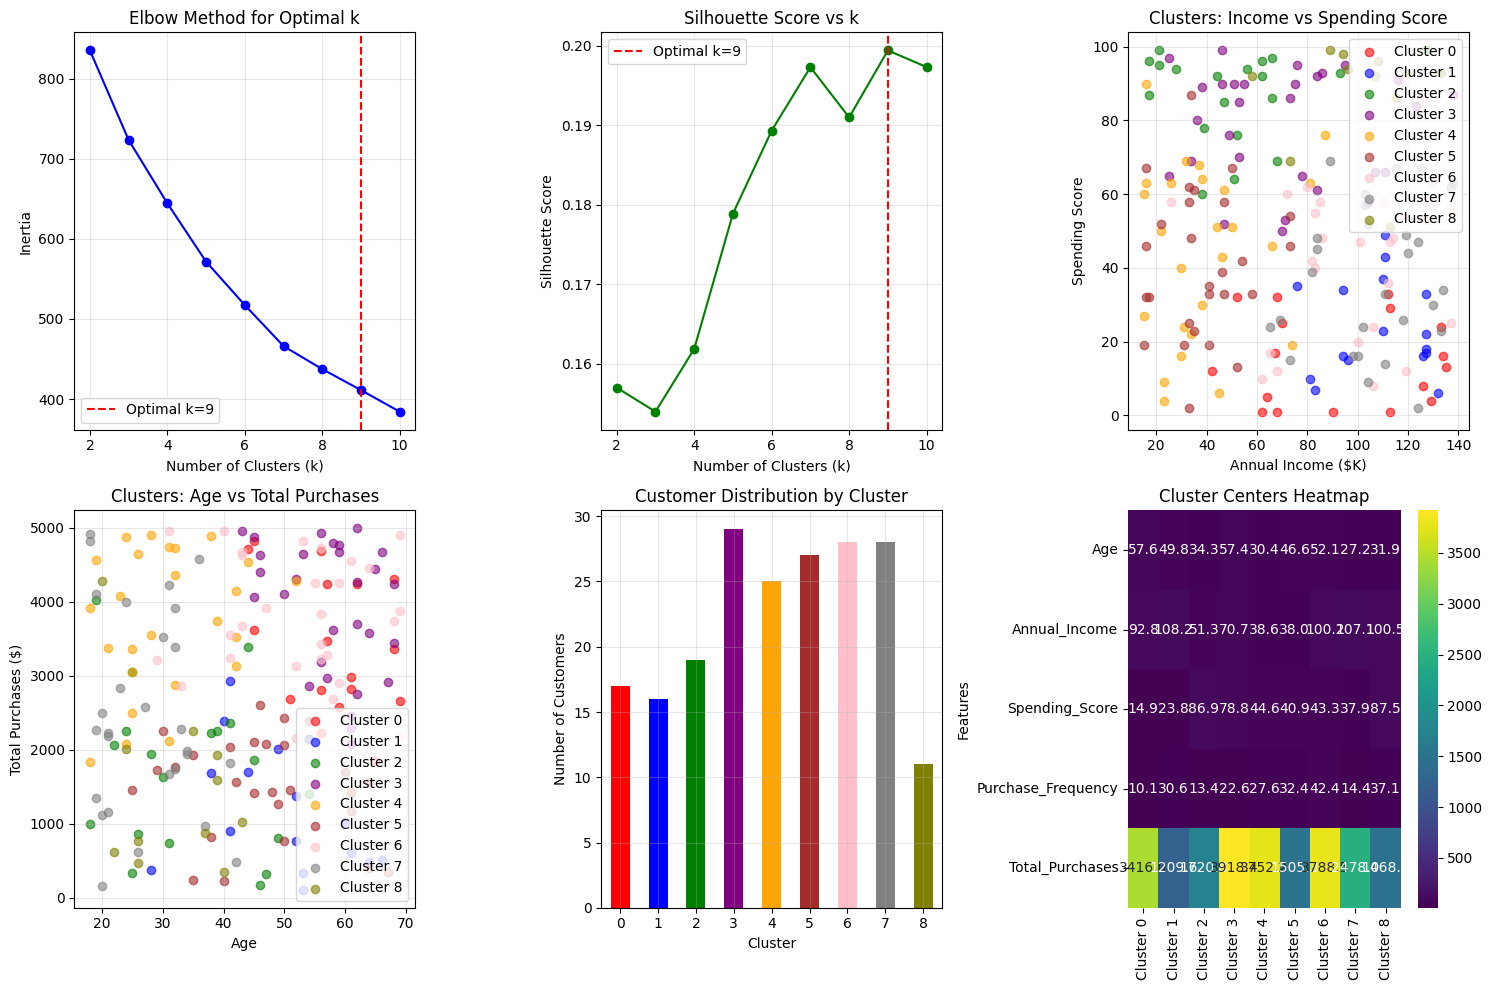


=== EXPORT RESULTS ===
Results exported to 'customer_clusters.csv'

=== BUSINESS RECOMMENDATIONS ===
Based on the clustering analysis:
1. Target high-value customers (high income, high spending) with premium products
2. Develop retention strategies for frequent purchasers
3. Create age-appropriate marketing campaigns for different clusters
4. Implement personalized recommendations based on cluster characteristics
5. Focus on converting low-spending customers to higher-spending segments

=== CLUSTERING COMPLETE ===
K-means clustering successfully applied to customer data!
Customers segmented into 9 distinct groups for targeted marketing.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Generate sample mall customer data
np.random.seed(42)
n_customers = 200

# Create synthetic customer data
data = {
    'CustomerID': range(1, n_customers + 1),
    'Age': np.random.randint(18, 70, n_customers),
    'Annual_Income': np.random.randint(15, 140, n_customers),
    'Spending_Score': np.random.randint(1, 100, n_customers),
    'Purchase_Frequency': np.random.randint(1, 50, n_customers),
    'Total_Purchases': np.random.randint(100, 5000, n_customers)
}

df = pd.DataFrame(data)

print("=== CUSTOMER SEGMENTATION USING K-MEANS ===")
print("\nDataset Overview:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")
print(f"Features: {list(df.columns)}")

# Feature selection for clustering
features = ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Total_Purchases']
X = df[features]

print(f"\nFeatures used for clustering: {features}")
print("\nDescriptive Statistics:")
print(X.describe())

# Data preprocessing - standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n=== FINDING OPTIMAL NUMBER OF CLUSTERS ===")

# Elbow method to find optimal k
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Find optimal k using silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_k}")

# Display results for different k values
print("\nCluster Analysis Results:")
for i, k in enumerate(k_range):
    print(f"K={k}: Inertia={inertias[i]:.2f}, Silhouette Score={silhouette_scores[i]:.3f}")

# Apply K-means with optimal k
print(f"\n=== APPLYING K-MEANS WITH K={optimal_k} ===")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

print(f"Final Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")
print(f"Final Inertia: {kmeans_final.inertia_:.2f}")

# Analyze clusters
print("\n=== CLUSTER ANALYSIS ===")
cluster_summary = df.groupby('Cluster')[features].mean()
print("Cluster Centers (Original Scale):")
print(cluster_summary)

print("\nCluster Sizes:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} customers ({count/len(df)*100:.1f}%)")

# Customer profiling
print("\n=== CUSTOMER PROFILES ===")
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} Profile:")
    print(f"  Size: {len(cluster_data)} customers")
    print(f"  Avg Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  Avg Income: ${cluster_data['Annual_Income'].mean():.0f}K")
    print(f"  Avg Spending Score: {cluster_data['Spending_Score'].mean():.1f}")
    print(f"  Avg Purchase Frequency: {cluster_data['Purchase_Frequency'].mean():.1f}")
    print(f"  Avg Total Purchases: ${cluster_data['Total_Purchases'].mean():.0f}")

# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Elbow curve
plt.subplot(2, 3, 1)
plt.plot(k_range, inertias, 'bo-')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Silhouette scores
plt.subplot(2, 3, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Income vs Spending Score
plt.subplot(2, 3, 3)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Annual Income ($K)')
plt.ylabel('Spending Score')
plt.title('Clusters: Income vs Spending Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Age vs Total Purchases
plt.subplot(2, 3, 4)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Total_Purchases'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Total Purchases ($)')
plt.title('Clusters: Age vs Total Purchases')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Cluster distribution
plt.subplot(2, 3, 5)
cluster_counts.plot(kind='bar', color=colors[:optimal_k])
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Cluster')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Plot 6: Heatmap of cluster centers
plt.subplot(2, 3, 6)
cluster_centers_scaled = scaler.inverse_transform(kmeans_final.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_scaled, columns=features)
sns.heatmap(cluster_centers_df.T, annot=True, fmt='.1f', cmap='viridis',
            xticklabels=[f'Cluster {i}' for i in range(optimal_k)])
plt.title('Cluster Centers Heatmap')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

# Export results
print("\n=== EXPORT RESULTS ===")
df_export = df.copy()
df_export.to_csv('customer_clusters.csv', index=False)
print("Results exported to 'customer_clusters.csv'")

# Business recommendations
print("\n=== BUSINESS RECOMMENDATIONS ===")
print("Based on the clustering analysis:")
print("1. Target high-value customers (high income, high spending) with premium products")
print("2. Develop retention strategies for frequent purchasers")
print("3. Create age-appropriate marketing campaigns for different clusters")
print("4. Implement personalized recommendations based on cluster characteristics")
print("5. Focus on converting low-spending customers to higher-spending segments")

print("\n=== CLUSTERING COMPLETE ===")
print("K-means clustering successfully applied to customer data!")
print(f"Customers segmented into {optimal_k} distinct groups for targeted marketing.")